<h1> Neural Networks in One Dimension </h1>

In [3]:
# Import the libraries we need for this app

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(42)

In [4]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [5]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [6]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [7]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [8]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

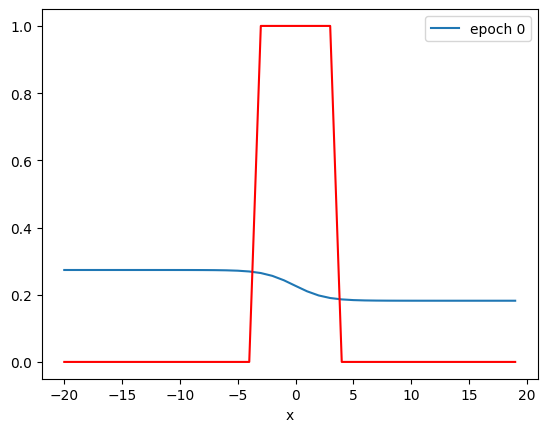

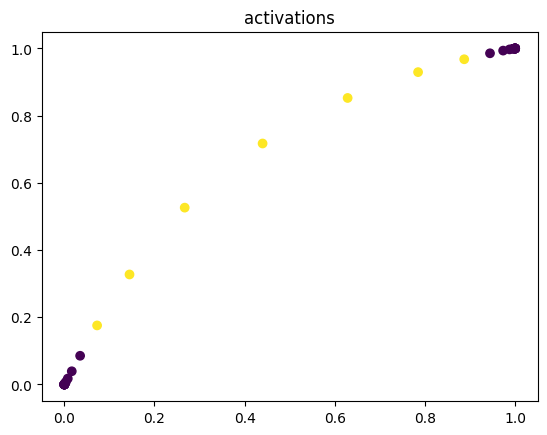

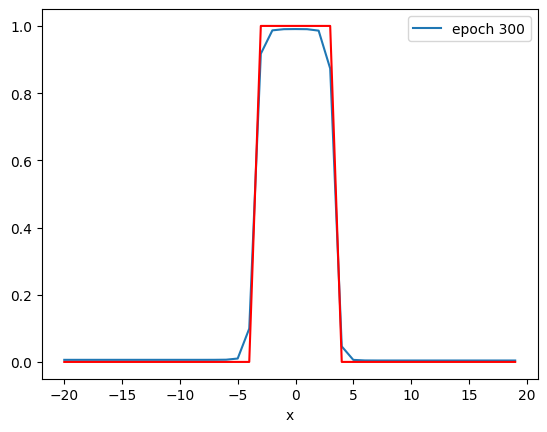

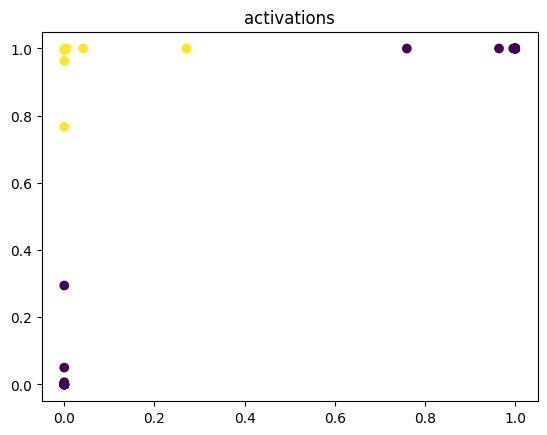

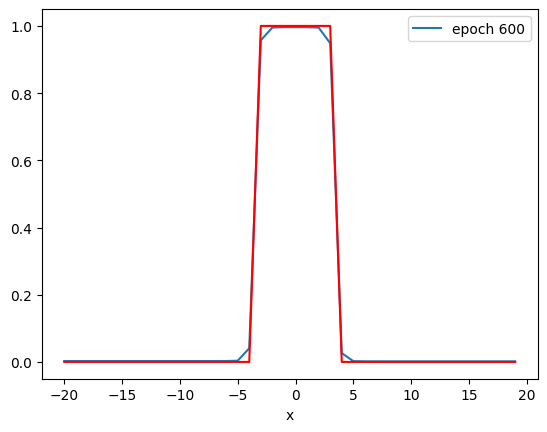

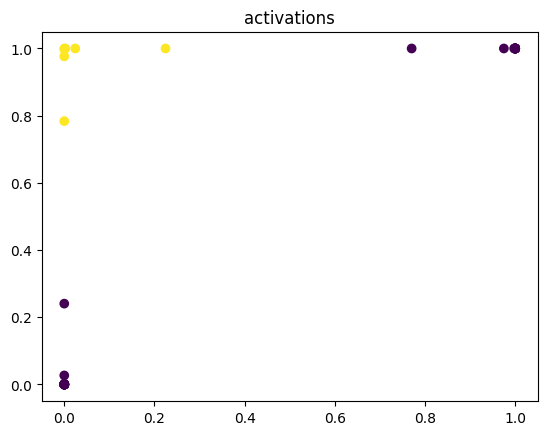

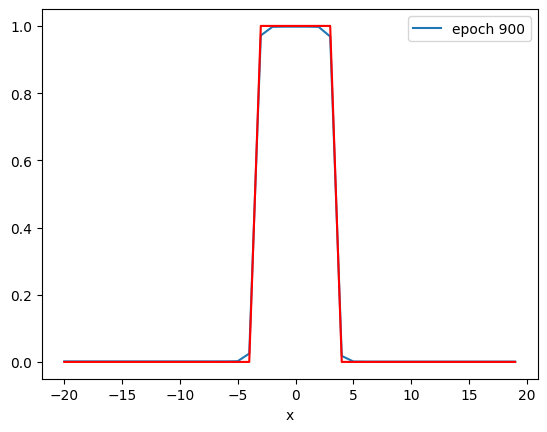

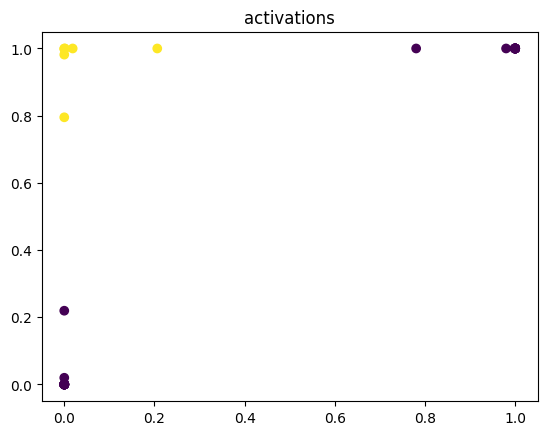

Text(0.5, 1.0, 'cross entropy loss')

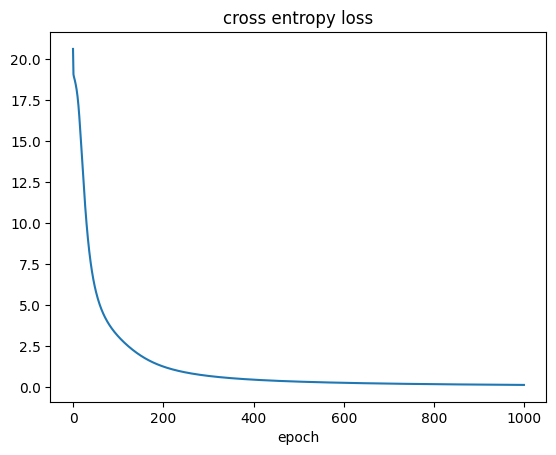

In [9]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [10]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9980], grad_fn=<SigmoidBackward0>)

In [11]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9980],
        [0.9975],
        [0.9722]], grad_fn=<SigmoidBackward0>)

In [12]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

<h3> İf we use mse loss </h3>

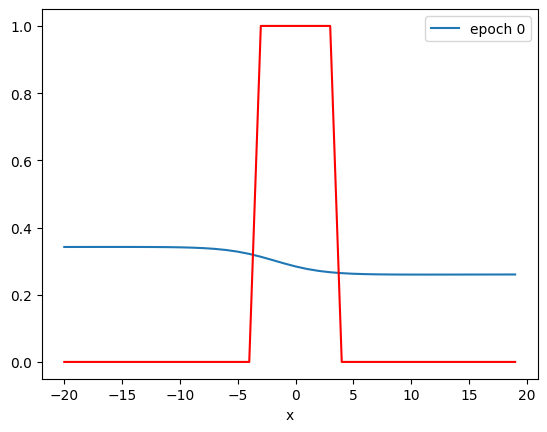

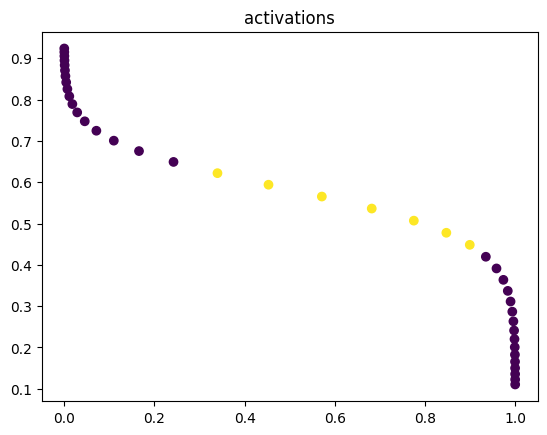

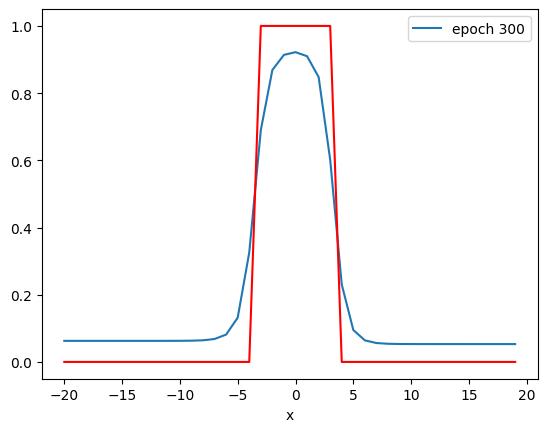

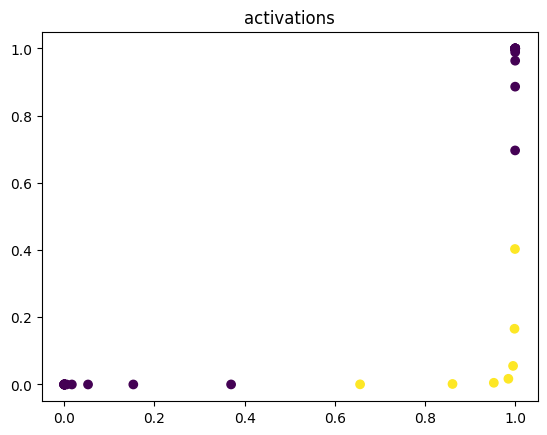

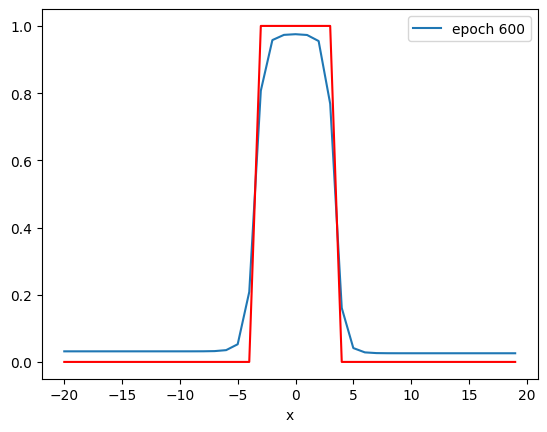

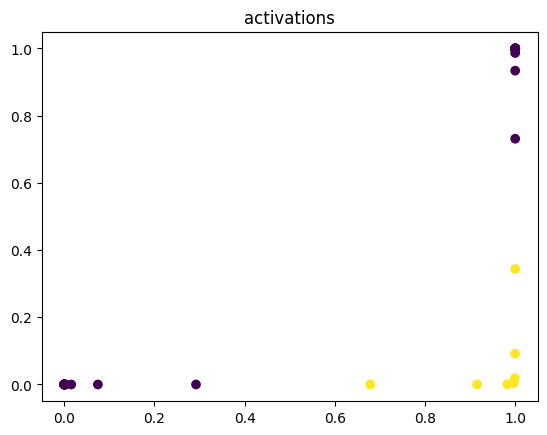

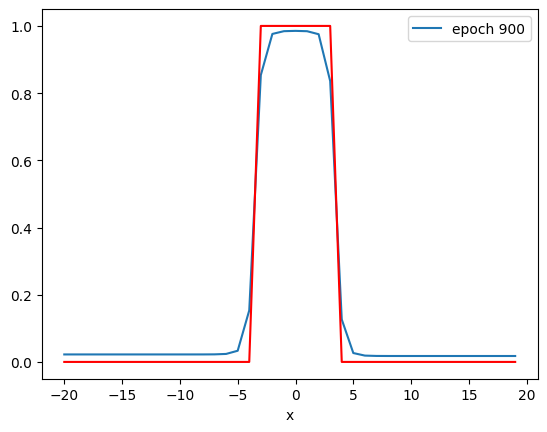

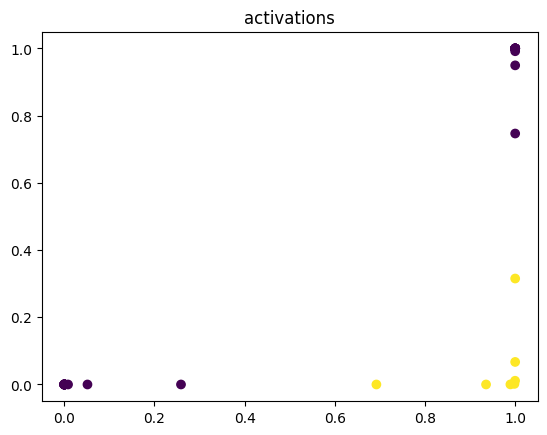

Text(0.5, 1.0, 'mse loss')

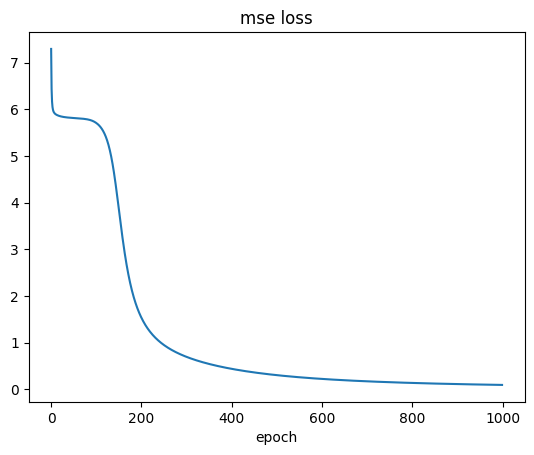

In [14]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#change the loss funciton
l_func= nn.MSELoss()
#train the model usein
cost_mse = train(Y, X, model, optimizer, l_func, epochs=1000)
#plot the loss
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('mse loss')

In [15]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9869], grad_fn=<SigmoidBackward0>)

In [16]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9869],
        [0.9785],
        [0.8494]], grad_fn=<SigmoidBackward0>)

In [17]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

<h2> More Hidden Neurons </h2>

In [27]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [28]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

In [29]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [30]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [31]:
 def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [32]:
data_set=Data()

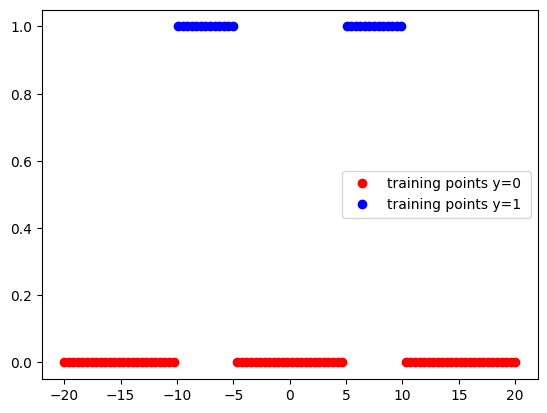

In [33]:
PlotStuff(data_set.x,data_set.y,leg=False)

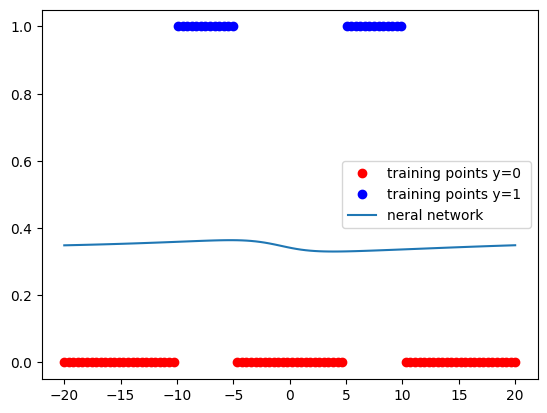

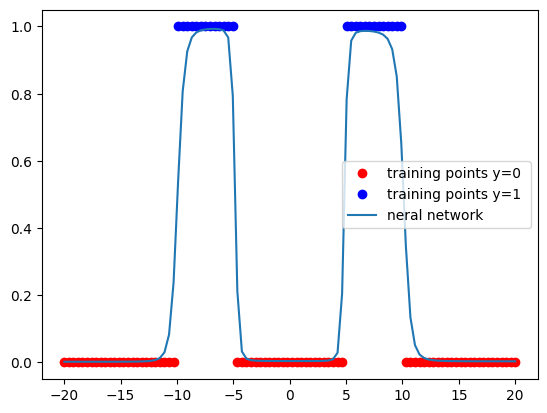

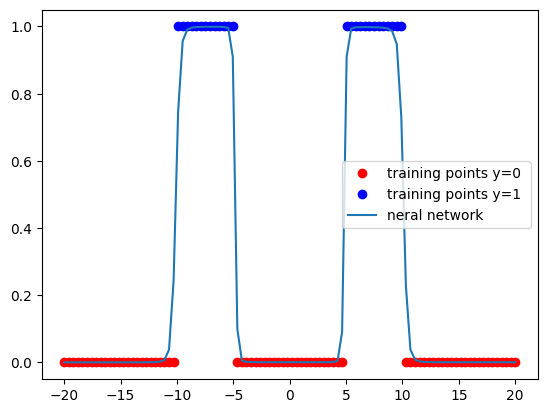

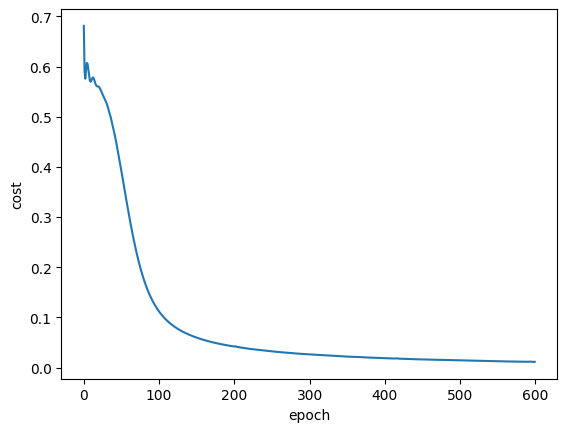

In [34]:
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

In [35]:
# this is for exercises
model= torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()

)

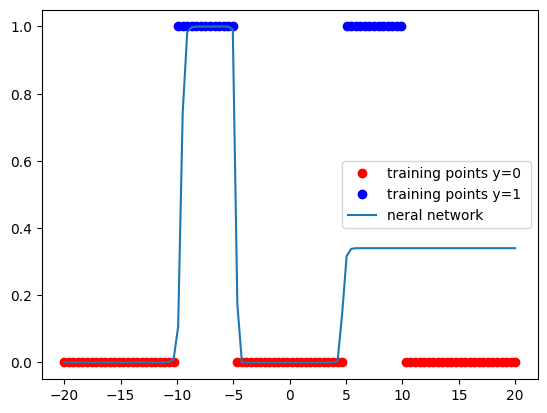

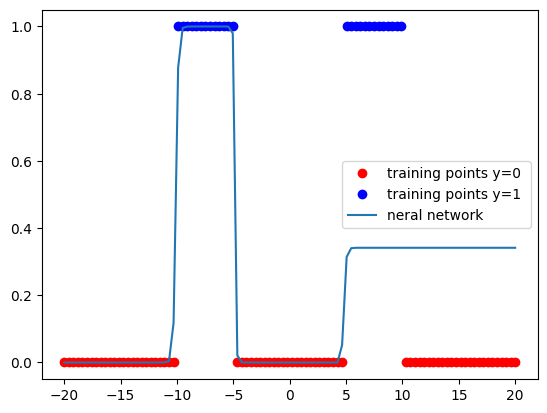

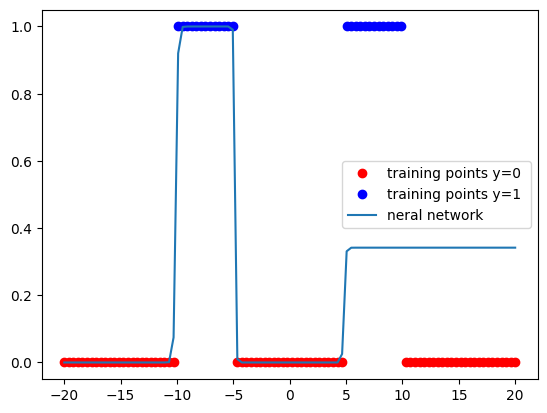

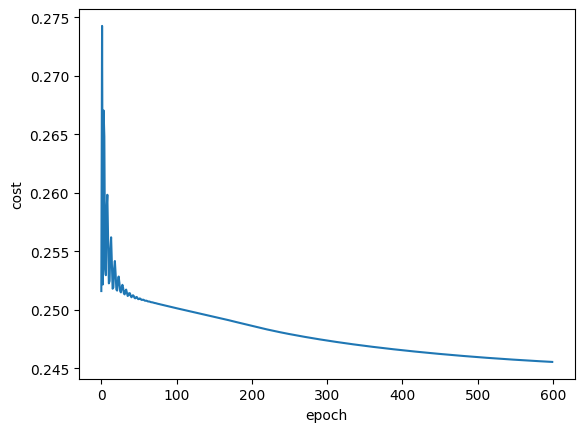

In [37]:
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

<h2>  Neural Networks with One Hidden Layer: Noisy XOR </h2>

In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [40]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [41]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [42]:
# Define the class Net with one hidden layer 

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        #output layer 
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = torch.sigmoid(self.linear2(x))
        return x

In [43]:
# Define the train model

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

In [44]:
# Define the class XOR_Data

class XOR_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

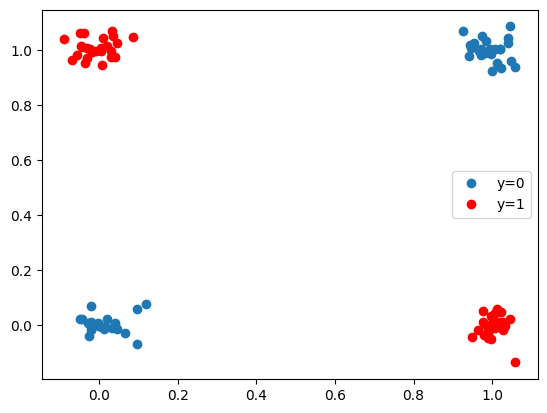

In [45]:
# Create dataset object

data_set = XOR_Data()
data_set.plot_stuff()

<h2>One Neuron</h2> 

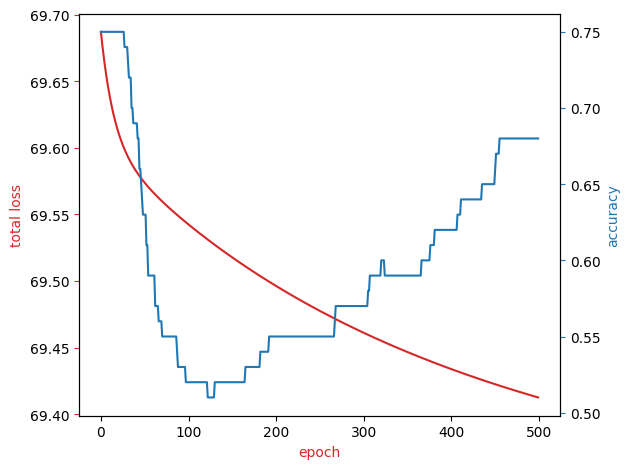

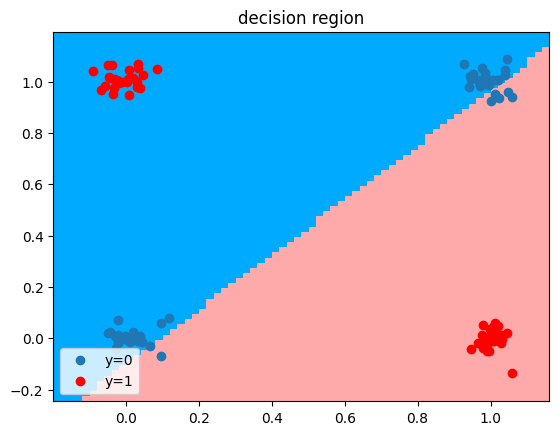

In [48]:
model=Net(2,1,1)
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

<h2>Two Neurons</h2> 

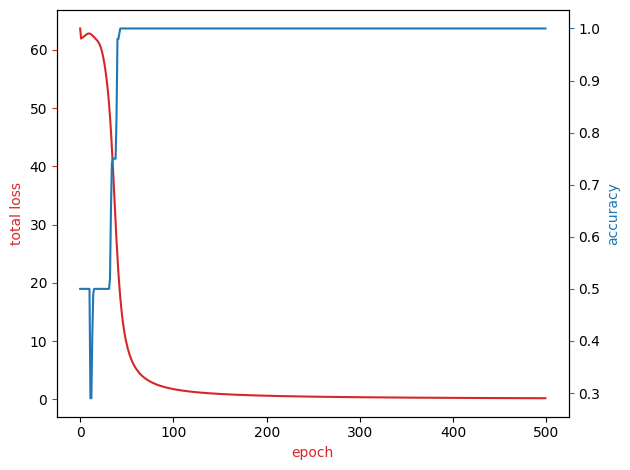

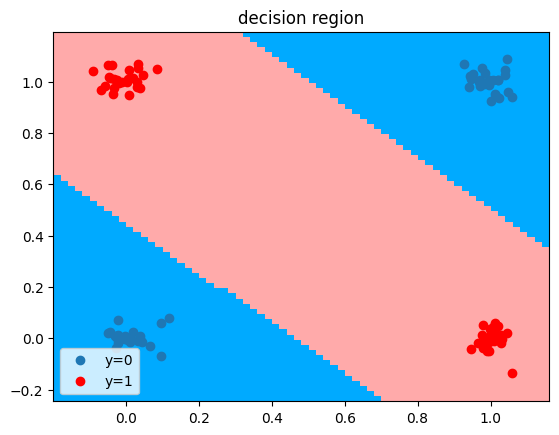

In [50]:
# Train the model
model=Net(2,2,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

<h2>Three Neurons</h2> 

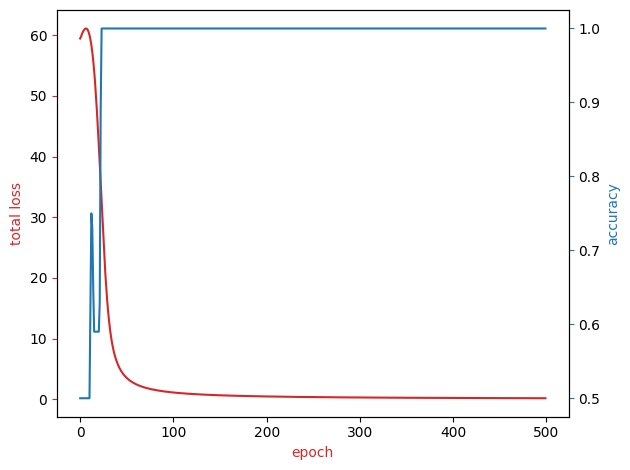

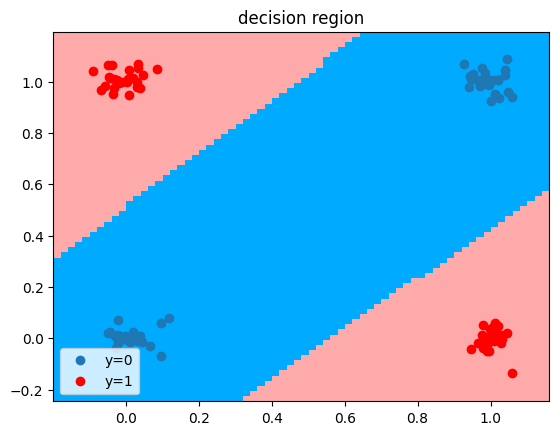

In [51]:
# Train the model
model=Net(2,3,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)